In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install comet_ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 726.7/726.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 37.6 MB/s eta 0:00:00
  Attempting uninstall: python-box
    Found existing installation: python-box 7.3.2
    Uninstalling python-box-7.3.2:
      Successfully uninstalled python-box-7.3.2


In [3]:
from comet_ml import start
from comet_ml.integration.pytorch import log_model

experiment = start(
  api_key="xQJQbTfreKFsRqwZdiyRyIr7Y",
  project_name="linear_regression_pipeline",
  workspace="talhaghaffarr"
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/talhaghaffarr/linear-regression-pipeline/f5baa3ebaddc46a8a8bec96144f8f43a



In [4]:
sheet_name = 'autoscout24-germany-dataset'
sheet_id = '1zaOgR76Ilar3q_bOiKa13zW2-RP7ezVgcqh8_J8mqdc'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
data1 = pd.read_csv(url)

data1.head()

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [6]:
summary_stats = data1.describe()
summary_stats

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [7]:
missing_values = data1.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


# Feature *Engineering*

In [8]:
sheet_name = 'economic_indicators_dataset_2010_2023'
sheet_id = '1CIbuuqXdYfRwh4Uz0Bga0In9GtZTkNGU7uvSYBlQJBA'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

data4 = pd.read_csv(url)

data4.head()

,Date,Country,Inflation Rate,GDP Growth Rate,Unemployment Rate,Interest Rate,Stock Index Value
0,2010-01-31,Brazil,1.23,0.69,10.48,7.71,21748.85
1,2010-01-31,France,6.76,2.59,4.27,7.39,10039.56
2,2010-01-31,USA,7.46,4.84,2.64,6.39,13129.10
3,2010-02-28,Brazil,5.43,0.31,8.26,6.09,23304.58
4,2010-02-28,Canada,0.69,-0.52,11.92,-0.51,16413.03


In [9]:

uk_data = data4[data4["Country"] == "UK"]
# print(uk_data)

uk_data['Date'] = pd.to_datetime(uk_data['Date'])


uk_data['Year'] = uk_data['Date'].dt.year


grouped_df = uk_data.groupby('Year').agg({
    'Inflation Rate': 'mean',
    'GDP Growth Rate': 'mean',
    'Unemployment Rate': 'mean',
    'Interest Rate': 'mean',
    'Stock Index Value': 'mean'
}).reset_index()

data4 = grouped_df.round(2)

# Display the result
data4.head()

<ipython-input-9-4c61f8a51f5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['Date'] = pd.to_datetime(uk_data['Date'])
<ipython-input-9-4c61f8a51f5c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['Year'] = uk_data['Date'].dt.year


,Year,Inflation Rate,GDP Growth Rate,Unemployment Rate,Interest Rate,Stock Index Value
0,2010,6.39,4.18,9.40,4.66,20324.76
1,2011,3.32,2.29,7.33,5.51,14186.71
2,2013,6.17,1.72,8.66,3.32,33417.99
3,2014,4.88,2.41,7.17,3.55,23284.15
4,2015,5.95,1.00,8.18,2.52,34527.65


In [10]:

grouped_df['Year'] = grouped_df['Year'].astype(int)
data1['year'] = data1['year'].astype(int)


data = pd.merge(data1, grouped_df, how='left', left_on='year', right_on='Year')


data.drop(columns=['Year'], inplace=True)

# Displaying the merged dataset
data.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Inflation Rate,GDP Growth Rate,Unemployment Rate,Interest Rate,Stock Index Value
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8,NaN,NaN,NaN,NaN,NaN
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1,6.546,3.026,7.050,3.810,24995.342
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5,6.735,6.195,7.705,4.445,19734.800
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0,6.735,6.195,7.705,4.445,19734.800
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0,6.735,6.195,7.705,4.445,19734.800


In [11]:
sheet_name = 'fuel price'
sheet_id = '107gTj8Y009vXsirTzKY_d6Y-O7SgWv8RcMCStea2uNA'
sheet_name_encoded = sheet_name.replace(' ', '%20')
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name_encoded}"

data5 = pd.read_csv(url)

data5.head()

,Unnamed: 0,Date,Petrol price,Diesel Price,Duty rate in pence/litre (ULSP),Duty rate in pence/litre (ULSD),VAT percentage rate (ULSP),VAT percentage rate (ULSD)
0,2,09/06/2003,74.59,76.77,45.82,45.82,17.5,17.5
1,3,16/06/2003,74.47,76.69,45.82,45.82,17.5,17.5
2,4,23/06/2003,74.42,76.62,45.82,45.82,17.5,17.5
3,5,30/06/2003,74.35,76.51,45.82,45.82,17.5,17.5
4,6,07/07/2003,74.28,76.46,45.82,45.82,17.5,17.5


In [12]:
data5 = data5.drop('Unnamed: 0', axis=1)
data5 = data5.drop('Duty rate in pence/litre (ULSP)', axis=1)
data5 = data5.drop('Duty rate in pence/litre (ULSD)', axis=1)
data5 = data5.drop('VAT percentage rate (ULSP)', axis=1)
data5 = data5.drop('VAT percentage rate (ULSD)', axis=1)

In [13]:
data5['Date'] = pd.to_datetime(data5['Date'], format='%d/%m/%Y')
data5['year'] = data5['Date'].dt.year
result = data5.groupby('year').mean(numeric_only=True).reset_index()

result['year'] = result['year'].astype(int)
data['year'] = data['year'].astype(int)
# Performing a left join on the 'year' column
data = pd.merge(data, result, how='left', on='year')
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Inflation Rate,GDP Growth Rate,Unemployment Rate,Interest Rate,Stock Index Value,Petrol price,Diesel Price
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8,NaN,NaN,NaN,NaN,NaN,86.796923,90.820385
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1,6.546,3.026,7.050,3.810,24995.342,117.512308,120.207115
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5,6.735,6.195,7.705,4.445,19734.800,108.949423,110.418654
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0,6.735,6.195,7.705,4.445,19734.800,108.949423,110.418654
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0,6.735,6.195,7.705,4.445,19734.800,108.949423,110.418654


In [14]:
#Add Fuel Price as a feature
data['Fuel Price'] = data.apply(
    lambda row: row['Petrol price'] if row['fuelType'] == 'Petrol' else (
        row['Diesel Price'] if row['fuelType'] == 'Diesel' else row['Petrol price']
    ), axis=1
)
data = data.drop(columns=['Petrol price', 'Diesel Price'])
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Inflation Rate,GDP Growth Rate,Unemployment Rate,Interest Rate,Stock Index Value,Fuel Price
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8,NaN,NaN,NaN,NaN,NaN,86.796923
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1,6.546,3.026,7.050,3.810,24995.342,117.512308
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5,6.735,6.195,7.705,4.445,19734.800,108.949423
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0,6.735,6.195,7.705,4.445,19734.800,108.949423
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0,6.735,6.195,7.705,4.445,19734.800,108.949423


In [15]:
from datetime import datetime

current_year = datetime.now().year
data['age'] = current_year - data['year']
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Inflation Rate,GDP Growth Rate,Unemployment Rate,Interest Rate,Stock Index Value,Fuel Price,age
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8,NaN,NaN,NaN,NaN,NaN,86.796923,20
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1,6.546,3.026,7.050,3.810,24995.342,117.512308,8
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5,6.735,6.195,7.705,4.445,19734.800,108.949423,9
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0,6.735,6.195,7.705,4.445,19734.800,108.949423,9
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0,6.735,6.195,7.705,4.445,19734.800,108.949423,9


In [16]:
# Calculating Inflation-Adjusted Price
data["inflation_adjusted_price"] = data["price"] * (1 + data["Inflation Rate"] / 100)

print(data[["model", "price", "Inflation Rate", "inflation_adjusted_price"]])

           model  price  Inflation Rate  inflation_adjusted_price
0            SLK   5200             NaN                       NaN
1        S Class  34948           6.546               37235.69608
2       SL CLASS  49948           6.735               53311.99780
3        G Class  61948           6.735               66120.19780
4        G Class  73948           6.735               78928.39780
...          ...    ...             ...                       ...
13114    C Class  35999           5.160               37856.54840
13115    B Class  24699           5.160               25973.46840
13116  GLC Class  30999           6.915               33142.58085
13117  CLS Class  37990           6.915               40617.00850
13118    S Class  54999           6.915               58802.18085

[13119 rows x 4 columns]


# Expolatory Data Analysis

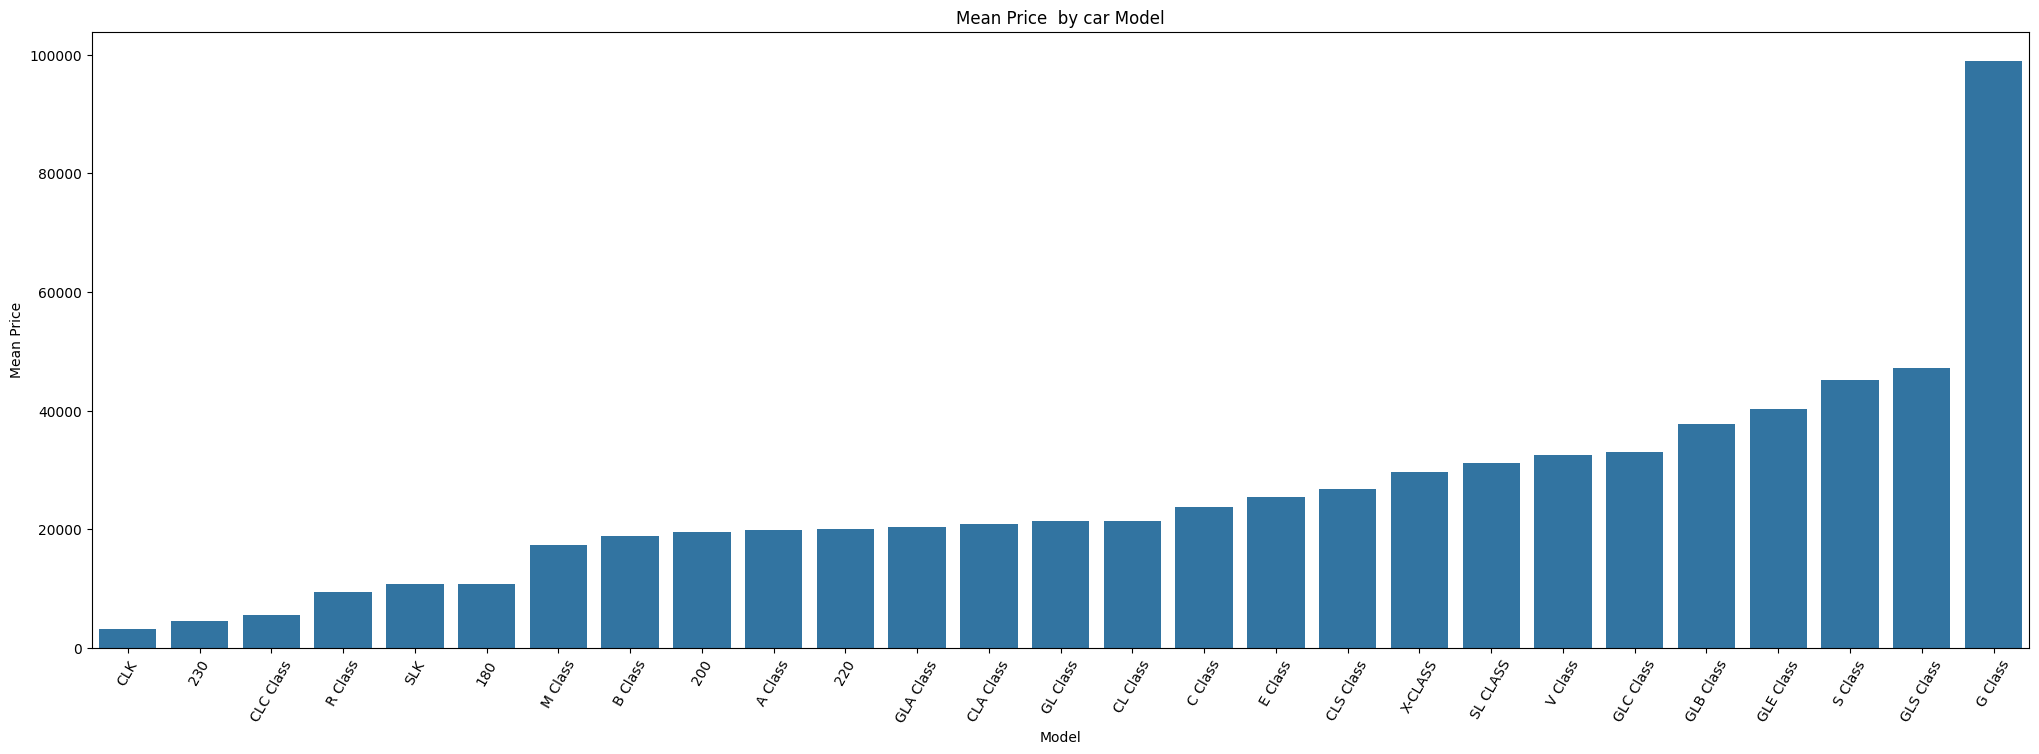

In [17]:
price_make = data.groupby('model')['price'].mean().reset_index()
price_make_sorted = price_make.sort_values(by='price', ascending=True)

# Pivot the data if needed for heatmap
plt.figure(figsize=(25, 8))
sns.barplot(x='model', y='price', data=price_make_sorted)
plt.title('Mean Price  by car Model')
plt.xlabel('Model')
plt.ylabel('Mean Price')
plt.xticks(rotation=60)
plt.show()

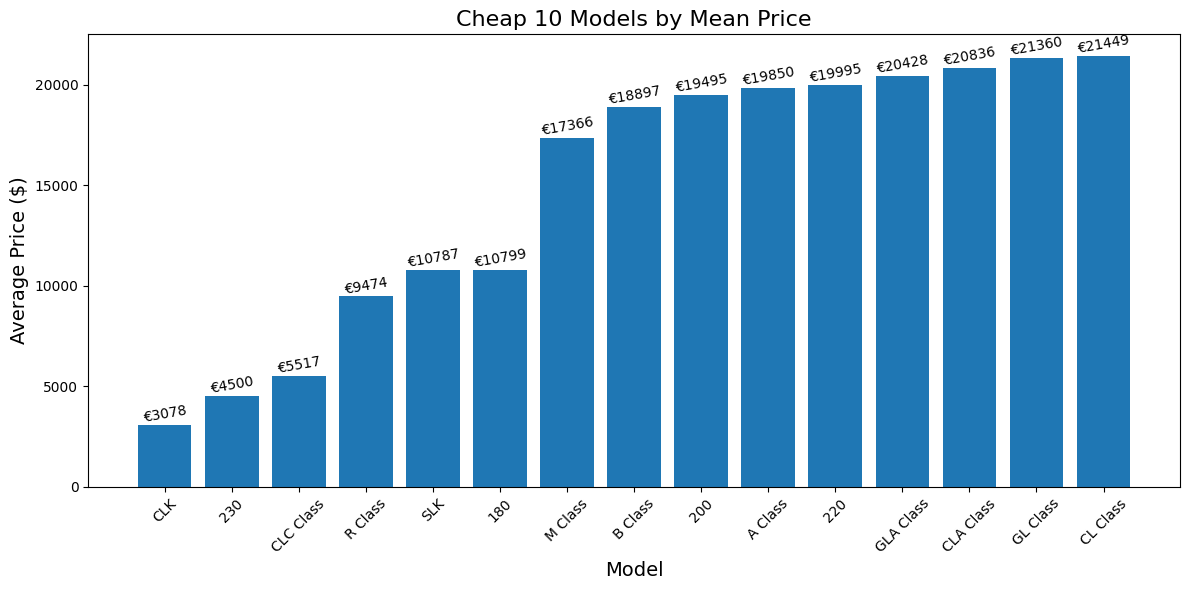

In [21]:
avg_mileage = data.groupby('model')['price'].mean().reset_index()

avg_mileage_sorted = avg_mileage.sort_values(by='price', ascending=True)

top_10_models = avg_mileage_sorted.head(15)

plt.figure(figsize=(12, 6))
plt.bar(top_10_models['model'], top_10_models['price'])

plt.title('Cheap 10 Models by Mean Price', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)

plt.xticks(rotation=45)

for index, row in top_10_models.iterrows():
    plt.text(row['model'], row['price'], f'€{row["price"]:.0f}', ha='center', va='bottom',rotation=10)

# Show the plot
plt.tight_layout()
plt.show()

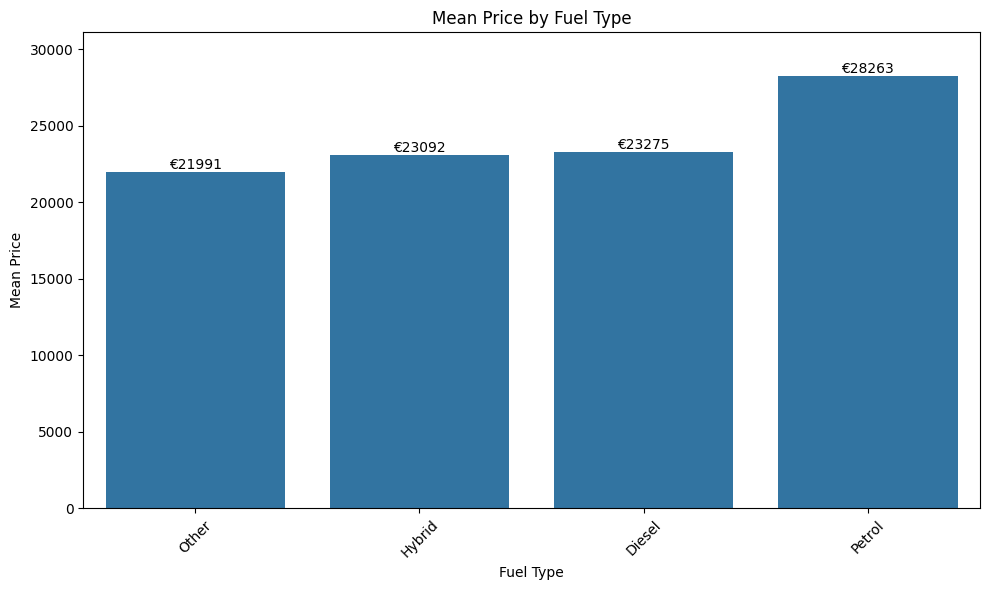

In [22]:
# Calculate mean price amounts for fuel type
price_by_fuel = data.groupby('fuelType')['price'].mean().reset_index()
price_by_fuel_sorted = price_by_fuel.sort_values(by='price', ascending=True)

# Create bar plot with sorted data
plt.figure(figsize=(10, 6))
sns.barplot(x='fuelType', y='price', data=price_by_fuel_sorted,
            order=price_by_fuel_sorted['fuelType'])

plt.title('Mean Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)

for i, v in enumerate(price_by_fuel_sorted['price']):
    plt.text(i, v, f'€{v:.0f}', ha='center', va='bottom')
plt.ylim(0, max(price_by_fuel_sorted['price']) * 1.1)

plt.tight_layout()
plt.show()

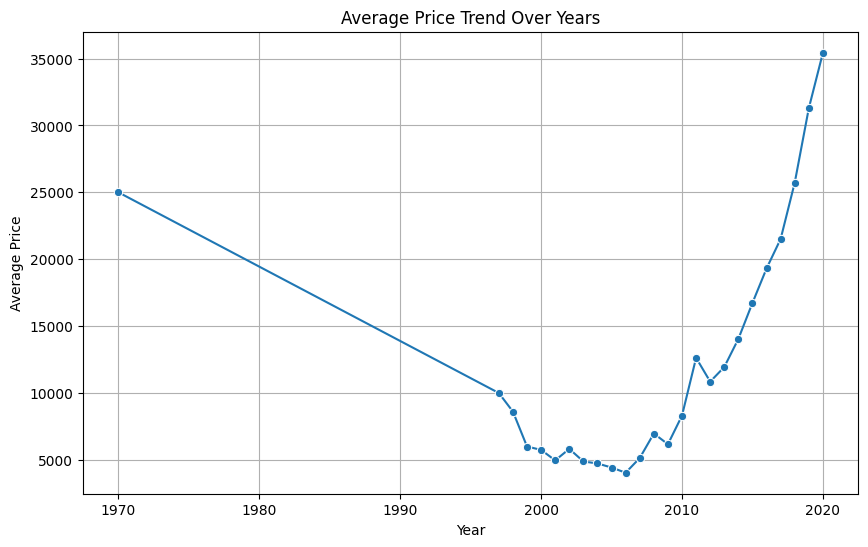

In [23]:
# Group by year and calculate average price
avg_price_by_year = data.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='price', data=avg_price_by_year, marker='o')
plt.title('Average Price Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

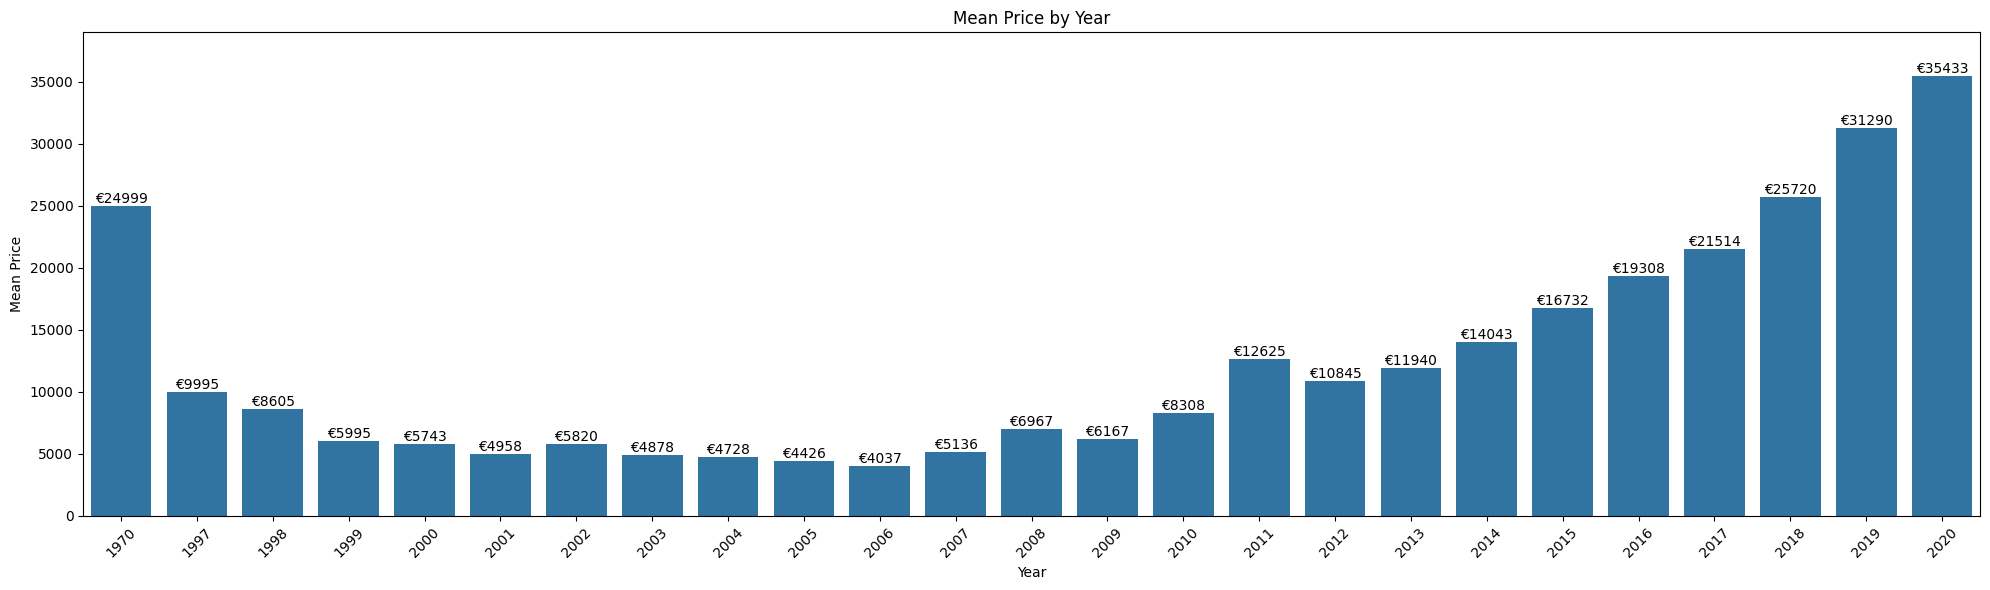

In [24]:
# Calculate mean price amounts by year
price_by_year = data.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(x='year', y='price', data=price_by_year,
            order=price_by_year['year'])

plt.title('Mean Price by Year')
plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)

for i, v in enumerate(price_by_year['price']):
    plt.text(i, v, f'€{v:.0f}', ha='center', va='bottom')

plt.ylim(0, max(price_by_year['price']) * 1.1)

plt.tight_layout()
plt.show()

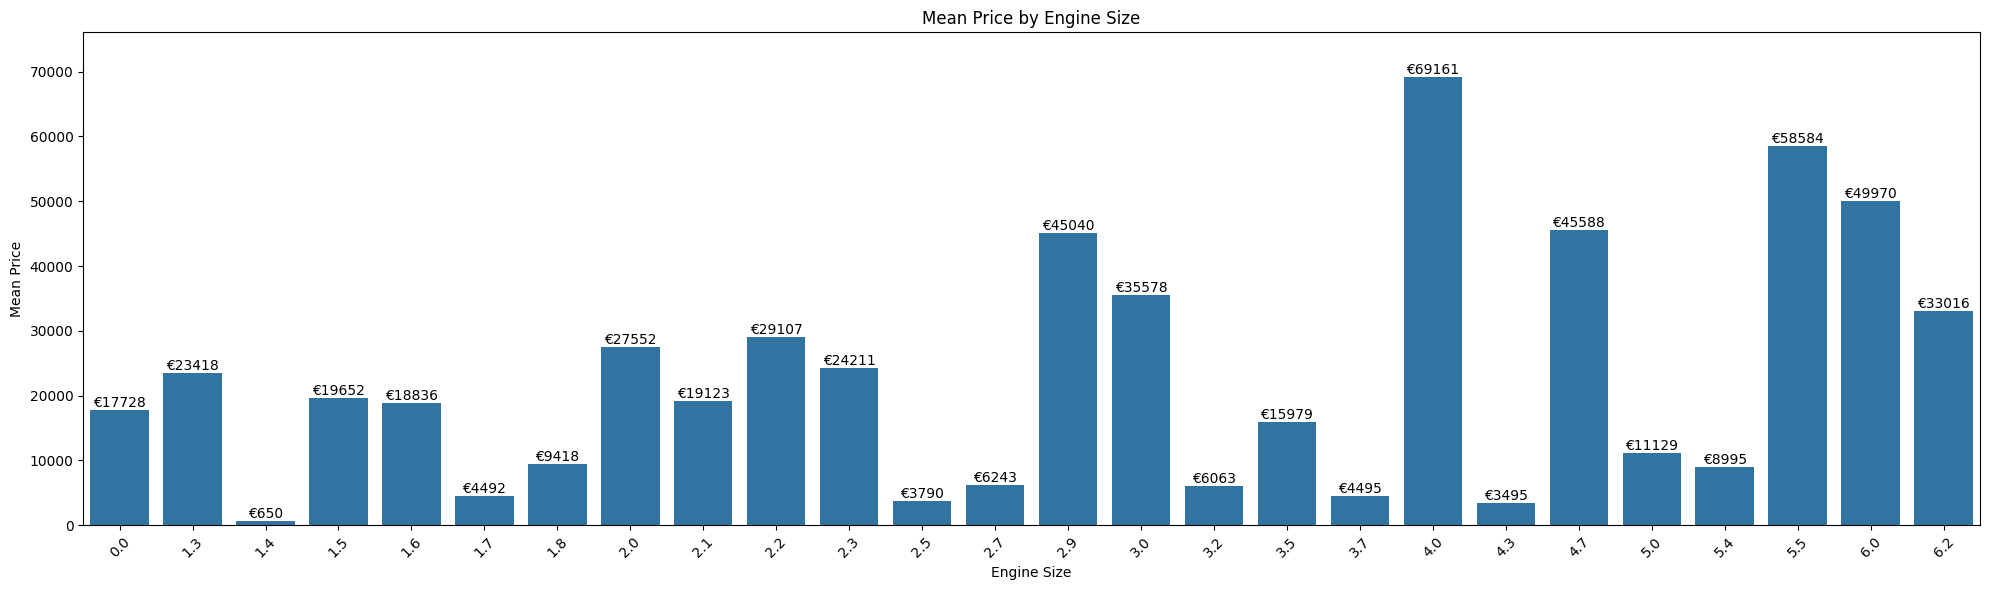

In [25]:
# Calculate mean price amounts by engine size
price_by_engine = data.groupby('engineSize')['price'].mean().reset_index()

# Create bar plot with data
plt.figure(figsize=(20, 6))
sns.barplot(x='engineSize', y='price', data=price_by_engine,
            order=price_by_engine['engineSize'])

plt.title('Mean Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)

# Add value labels directly above each bar
for i, v in enumerate(price_by_engine['price']):
    plt.text(i, v, f'€{v:.0f}', ha='center', va='bottom')

# Adjust y-axis limit to accommodate labels
plt.ylim(0, max(price_by_engine['price']) * 1.1)

plt.tight_layout()
plt.show()

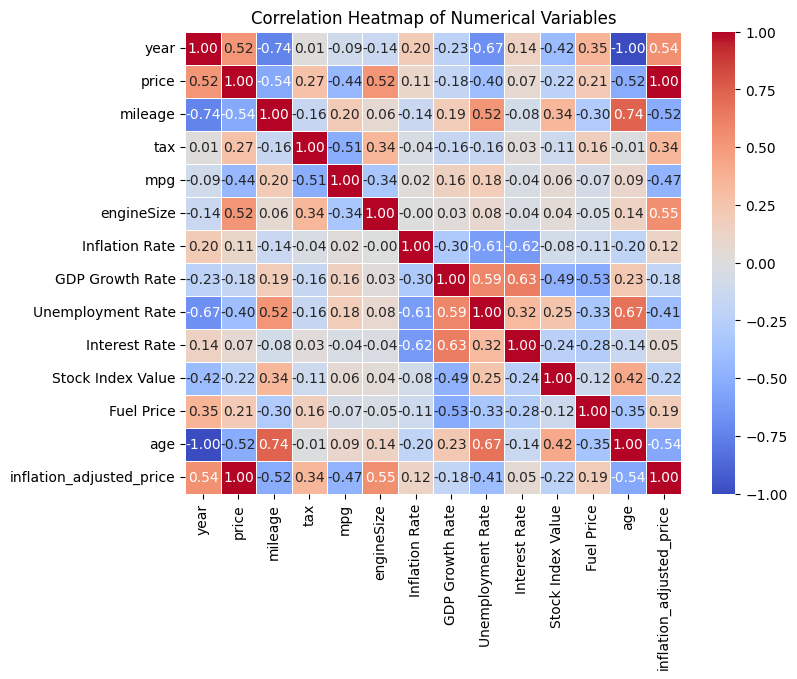

In [26]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

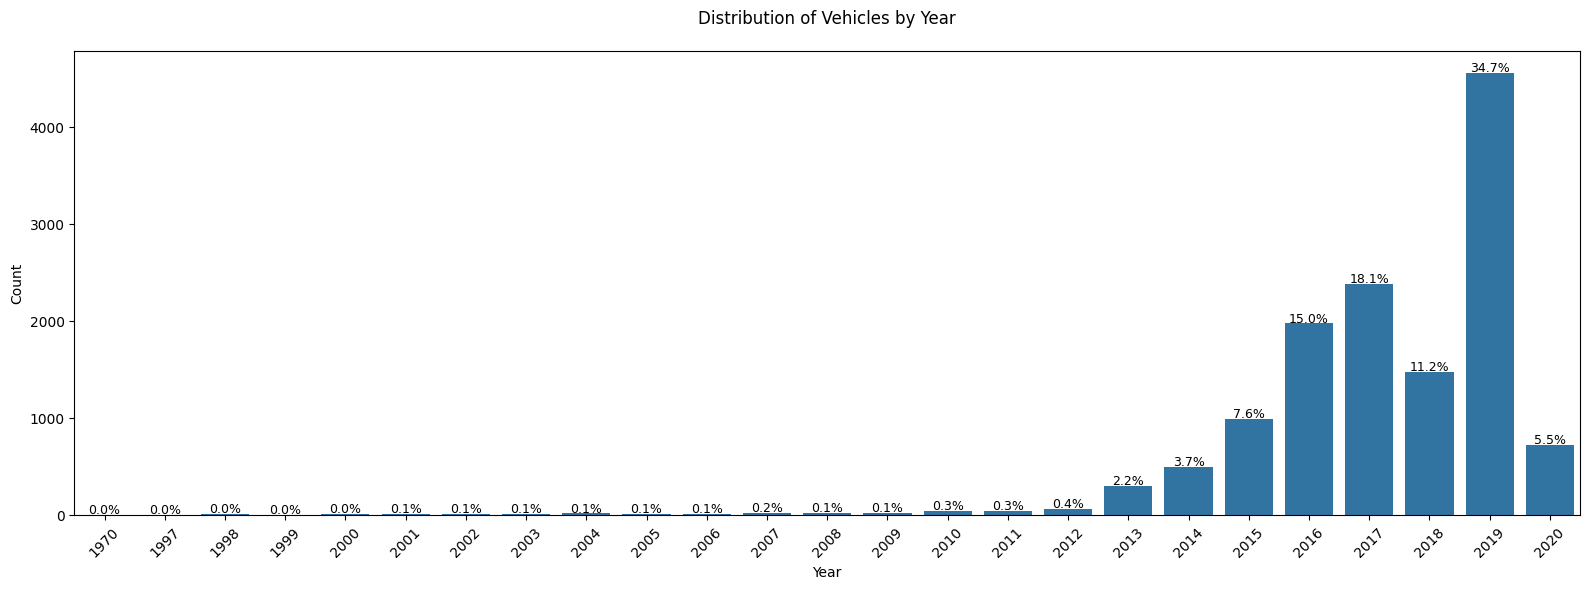


Vehicle Counts by Year:
Year 1970: 1 vehicles (0.0%)
Year 1997: 1 vehicles (0.0%)
Year 1998: 4 vehicles (0.0%)
Year 1999: 1 vehicles (0.0%)
Year 2000: 3 vehicles (0.0%)
Year 2001: 10 vehicles (0.1%)
Year 2002: 9 vehicles (0.1%)
Year 2003: 7 vehicles (0.1%)
Year 2004: 13 vehicles (0.1%)
Year 2005: 9 vehicles (0.1%)
Year 2006: 8 vehicles (0.1%)
Year 2007: 22 vehicles (0.2%)
Year 2008: 16 vehicles (0.1%)
Year 2009: 17 vehicles (0.1%)
Year 2010: 38 vehicles (0.3%)
Year 2011: 38 vehicles (0.3%)
Year 2012: 57 vehicles (0.4%)
Year 2013: 292 vehicles (2.2%)
Year 2014: 491 vehicles (3.7%)
Year 2015: 991 vehicles (7.6%)
Year 2016: 1971 vehicles (15.0%)
Year 2017: 2381 vehicles (18.1%)
Year 2018: 1467 vehicles (11.2%)
Year 2019: 4553 vehicles (34.7%)
Year 2020: 719 vehicles (5.5%)


In [27]:

year_counts = data['year'].value_counts().sort_index()

plt.figure(figsize=(16, 6))
sns.countplot(x='year', data=data, order=sorted(data['year'].unique()))

plt.title('Distribution of Vehicles by Year', pad=20)
plt.xlabel('Year')
plt.ylabel('Count')

# Calculate percentages
year_percentages = (year_counts / len(data)) * 100

for index, value in enumerate(year_counts):
    percentage = f"{year_percentages.iloc[index]:.1f}%"
    plt.text(index, value + 20, percentage, ha='center', fontsize=9)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\nVehicle Counts by Year:")
for year, count in year_counts.items():
    percentage = year_percentages[year]
    print(f"Year {year}: {count} vehicles ({percentage:.1f}%)")

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   model                     13119 non-null  object 
 1   year                      13119 non-null  int64  
 2   price                     13119 non-null  int64  
 3   transmission              13119 non-null  object 
 4   mileage                   13119 non-null  int64  
 5   fuelType                  13119 non-null  object 
 6   tax                       13119 non-null  int64  
 7   mpg                       13119 non-null  float64
 8   engineSize                13119 non-null  float64
 9   Inflation Rate            12941 non-null  float64
 10  GDP Growth Rate           12941 non-null  float64
 11  Unemployment Rate         12941 non-null  float64
 12  Interest Rate             12941 non-null  float64
 13  Stock Index Value         12941 non-null  float64
 14  Fuel P

In [29]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])


Inflation Rate              178
GDP Growth Rate             178
Unemployment Rate           178
Interest Rate               178
Stock Index Value           178
Fuel Price                   29
inflation_adjusted_price    178
dtype: int64


In [30]:
data.dropna(inplace=True) #Dropping rows with missing values


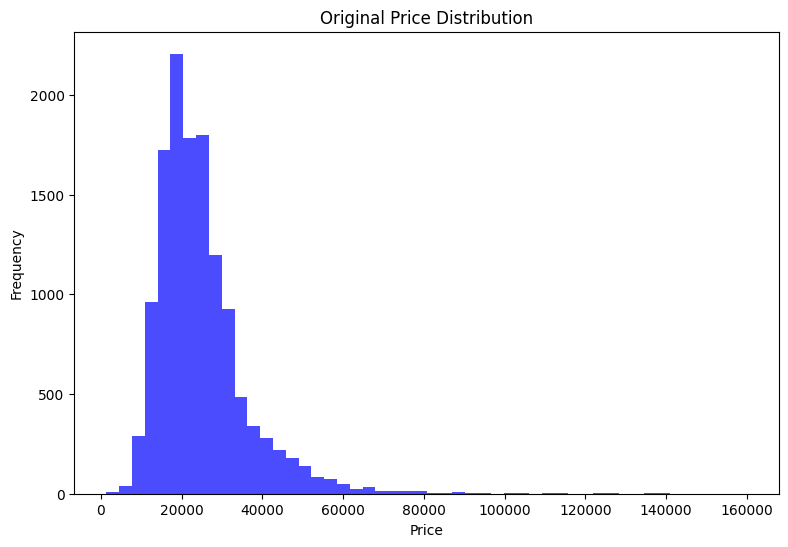

In [31]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.hist(data['price'], bins=50, color='blue', alpha=0.7)
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Calculate 99th percentile threshold
price_threshold = data['price'].quantile(0.99)
# print(f"99th percentile price threshold: £{price_threshold:,.2f}")

data = data[data['price'] <= price_threshold]


In [32]:
summary_stats = data.describe()
summary_stats

,year,price,mileage,tax,mpg,engineSize,Inflation Rate,GDP Growth Rate,Unemployment Rate,Interest Rate,Stock Index Value,Fuel Price,age,inflation_adjusted_price
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000
mean,2017.422996,24310.462025,21377.194676,127.622356,55.667044,2.044626,6.298388,3.035002,7.052127,3.885830,23281.398442,122.906428,7.577004,25851.925103
std,1.801526,9722.723628,20040.420784,61.419697,14.941435,0.521033,0.788990,1.812048,0.954000,1.366172,4121.108941,8.203871,1.801526,10359.040538
min,2010.000000,1350.000000,1.000000,0.000000,1.100000,0.000000,3.322000,0.996667,5.977500,2.516667,14186.712000,108.949423,5.000000,1436.265000
25%,2016.000000,17499.000000,6200.000000,125.000000,46.300000,1.600000,5.950000,1.470000,5.977500,2.880000,20054.922500,114.996923,6.000000,18640.222700
50%,2018.000000,22490.000000,15096.000000,145.000000,56.500000,2.000000,6.735000,3.026000,7.050000,3.810000,21716.995000,124.970577,7.000000,23947.890850
75%,2019.000000,28884.000000,31097.000000,145.000000,64.200000,2.100000,6.915000,5.112500,7.705000,4.445000,24995.342000,131.706923,9.000000,30677.986250
max,2020.000000,65995.000000,259000.000000,580.000000,217.300000,6.200000,6.915000,6.195000,9.400000,8.295000,34527.650000,140.586731,15.000000,70553.208500


In [38]:
from comet_ml import Experiment
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


experiment = Experiment(
    project_name="linear_regression_merc",
    workspace="talhaghaffarr",
    api_key = "xQJQbTfreKFsRqwZdiyRyIr7Y"

)

experiment.log_parameter("dataset_size", data.shape[0])


categorical_features = ["model", "fuelType", "transmission"]
numerical_features = ["mileage", "mpg", "tax", "engineSize", "year", "Fuel Price",
                             "Inflation Rate", "GDP Growth Rate", "Unemployment Rate", "age"]
target = "price"


# Log parameters
experiment.log_parameters({
    "categorical_features": categorical_features,
    "numerical_features": numerical_features,
    "target": target,
    "test_size": 0.3,
    "random_state": 42,
    "model_type": "LinearRegression",
    "preprocessor": "ColumnTransformer (StandardScaler + OneHotEncoder)"
})

ml_data = data[categorical_features + numerical_features + [target]].dropna()

X = ml_data[categorical_features + numerical_features]
y = ml_data[target]
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

experiment.log_parameter("train_samples", X_train.shape[0])
experiment.log_parameter("test_samples", X_test.shape[0])


model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Log metrics
experiment.log_metrics({
    "MAE": mae,
    "R2": r2
})

# Log the trained model
experiment.log_model(model_pipeline, "linear_regression_merc10")

# End the experiment
experiment.end()

# results
model_results_updated = {
    "Mean Absolute Error (MAE)": mae,
    "R² Score": r2
}

model_results_updated

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/talhaghaffarr/linear-regression-merc/b3d8efbde22e4ec0b279657cec174d0e

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET ERROR: Error logging the model Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['mileage', 'mpg', 'tax',
                                                   'engineSize', 'year',
                                                   'Fuel Price',
                                                   'Inflation Rate',
                                                   'GDP Growth Rate',
                                           

{'Mean Absolute Error (MAE)': 2919.273833603459,
 'R² Score': 0.8270755353821827}

In [39]:
from sklearn.preprocessing import PolynomialFeatures

model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("poly_features", PolynomialFeatures(degree=2)),
    ("regressor", LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
model_results_updated = {
    "Mean Absolute Error (MAE)": mae,
    "R² Score": r2
}

print(model_results_updated)

{'Mean Absolute Error (MAE)': 1927.4898314218165, 'R² Score': 0.9159059452261019}


In [41]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", SVR(kernel='rbf', C=1000, epsilon=0.5))  # Set optimized hyperparameters
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
model_results_updated = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "R² Score": r2
}

print(model_results_updated)



{'Mean Absolute Error (MAE)': 2001.1905261935908, 'Mean Squared Error (MSE)': 9889398.87264994, 'R² Score': 0.8923959362763039}


In [42]:
from sklearn.tree import DecisionTreeRegressor

# Updated pipeline with Decision Tree
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
model_results_updated = {
    "Mean Absolute Error (MAE)": mae,
    "R² Score": r2
}

model_results_updated

{'Mean Absolute Error (MAE)': 1832.9882192799896,
 'R² Score': 0.9101679593007475}

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/talhaghaffarr/random-forest-merc/fa37561f58c242f5ac4dd1fa0e48ad15

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET ERROR: Error logging the model Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['mileage', 'mpg', 'tax',
                                                   'engineSize', 'year',
                                                   'Fuel Price',
                                                   'Inflation Rate',
                                                   'GDP Growth Rate',
                                               

Random Forest Model Results:
{'Mean Absolute Error (MAE)': 1468.2985154279322, 'R² Score': 0.9462901562686571}


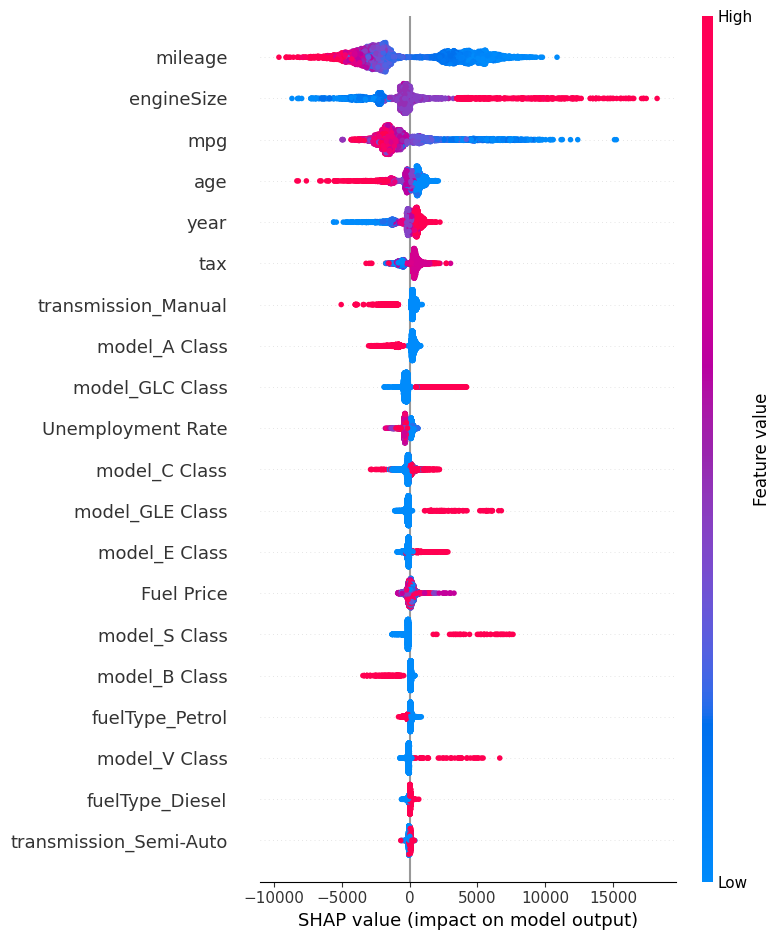

In [43]:
from sklearn.ensemble import RandomForestRegressor
import shap

# Initialize Comet ML Experiment
experiment = Experiment(
    api_key="xQJQbTfreKFsRqwZdiyRyIr7Y",
    project_name="random-forest-merc",
    workspace="talhaghaffarr",
)


# Pipeline for Random Forest Regressor model
rf_model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42))
])

# model hyperparameters
experiment.log_parameters({
    "model_type": "RandomForestRegressor",
    "n_estimators": 50,
    "n_jobs": -1,
    "random_state": 42,
})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Log train/test split details
experiment.log_parameter("train_samples", X_train.shape[0])
experiment.log_parameter("test_samples", X_test.shape[0])


rf_model_pipeline.fit(X_train, y_train)
y_pred_rf = rf_model_pipeline.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Log evaluation metrics
experiment.log_metrics({
    "MAE": mae_rf,
    "R2": r2_rf,
})


experiment.log_model(rf_model_pipeline, "random_forest_regression_merc13")
#claculating for shap plot
explainer = shap.TreeExplainer(rf_model_pipeline.named_steps["regressor"])
X_test_processed = rf_model_pipeline.named_steps["preprocessor"].transform(X_test)
X_test_processed = X_test_processed.astype(np.float64)

shap_values = explainer.shap_values(X_test_processed)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test_processed, feature_names=numerical_features + list(rf_model_pipeline.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_features)), show=False)  # show=False to prevent displaying
plt.savefig("shap_summary_plot.png")

experiment.log_image("shap_summary_plot.png")
experiment.end()

# Display results
rf_model_results = {
    "Mean Absolute Error (MAE)": mae_rf,
    "R² Score": r2_rf
}

print("Random Forest Model Results:")
print(rf_model_results)

In [44]:
from xgboost import XGBRegressor


# Initialize Comet ML Experiment
experiment = Experiment(
    api_key="xQJQbTfreKFsRqwZdiyRyIr7Y",
    project_name="xgboost-regression-merc",
    workspace="talhaghaffarr",
)

X = data.drop(columns=['price'])
y = data['price']

# Pipeline for XGBoost Regressor model
xgb_model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(n_estimators=500, random_state=42, learning_rate=0.1))
])

# Log model hyperparameters
experiment.log_parameters({
    "model_type": "XGBRegressor",
    "n_estimators": 500,
    "random_state": 42,
    "learning_rate": 0.1,
})

# Train the model
xgb_model_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_model_pipeline.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Log evaluation metrics
experiment.log_metrics({
    "MAE": mae_xgb,
    "R2": r2_xgb,
})

# Log the trained model
experiment.log_model(xgb_model_pipeline, "xgboost_regression_merc6")

# End the experiment
experiment.end()

# Display results
xgb_model_results = {
    "Mean Absolute Error (MAE)": mae_xgb,
    "R² Score": r2_xgb
}

print("XGBoost Model Results:")
print(xgb_model_results)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
ERROR:sentry_sdk.errors:Internal error in sentry_sdk
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 516, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 1395, in getresponse
    response.begin()
  File "/usr/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
        

XGBoost Model Results:
{'Mean Absolute Error (MAE)': 1356.043212890625, 'R² Score': 0.9558126926422119}


In [45]:
from sklearn.model_selection import GridSearchCV

import lightgbm as lgb

# Initialize Comet ML Experiment
experiment = Experiment(
    api_key="xQJQbTfreKFsRqwZdiyRyIr7Y",
    project_name="lightgbm-lightgbm_regression_merc",
    workspace="talhaghaffarr",
)


# Define the LightGBM Regressor model
lgbm_model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", lgb.LGBMRegressor(random_state=42))
])

# Set hyperparameter grid for tuning
param_grid = {
    'regressor__n_estimators': [100, 200, 500, 1000],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [-1, 5, 15],
    'regressor__min_child_samples': [1, 20, 30]
}

# Loging hyperparameter grid
experiment.log_parameters({
    "param_grid": param_grid,
})

# Performing Grid Search
grid_search = GridSearchCV(lgbm_model_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Log the best hyperparameters
experiment.log_parameters({
    "best_n_estimators": grid_search.best_params_['regressor__n_estimators'],
    "best_learning_rate": grid_search.best_params_['regressor__learning_rate'],
    "best_max_depth": grid_search.best_params_['regressor__max_depth'],
    "best_min_child_samples": grid_search.best_params_['regressor__min_child_samples'],
})


y_pred_lgbm = grid_search.predict(X_test)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

# Log evaluation metrics
experiment.log_metrics({
    "MAE": mae_lgbm,
    "R2": r2_lgbm,
})

# Loging the best model
experiment.log_model(grid_search.best_estimator_, "lightgbm_regression_merc2")

# End the experiment
experiment.end()


lgbm_model_results = {
    "Mean Absolute Error (MAE)": mae_lgbm,
    "R² Score": r2_lgbm
}

print("LightGBM Model Results:")
print(lgbm_model_results)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/talhaghaffarr/lightgbm-lightgbm-regression-merc/df41b02e21b94777b36fbd52bba174f0

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET ERROR: Failed to extract parameters from estimator
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 516
[LightGBM] [Info] Number of data points in the train set: 8967, number of used features: 41
[LightGBM] [Info] Start training from score 24353.198171


COMET ERROR: Failed to extract parameters from estimator
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
COMET ERROR: Error logging the model Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['mileage', 'mpg', 'tax',
                                                   'engineSize', 'year',
                                                   'Fuel Price',
                                                   'Inflation Rate',
                                                   'GDP Growth Rate',
                                                   'Unemployment Rate',
                                                   'age']),
                                                 ('cat',
                                                  OneHotEncod

LightGBM Model Results:
{'Mean Absolute Error (MAE)': 1362.2983525389604, 'R² Score': 0.9546670258363692}


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from scipy.stats import ttest_rel, wilcoxon, f
import statsmodels.api as sm

class RandomForestModel:
    def __init__(self, categorical_features, numerical_features, target):
        self.categorical_features = categorical_features
        self.numerical_features = numerical_features
        self.target = target
        self.model_pipeline = self._create_pipeline()

    def _create_pipeline(self):
        preprocessor = ColumnTransformer(transformers=[
            ("num", StandardScaler(), self.numerical_features),
            ("cat", OneHotEncoder(handle_unknown="ignore"), self.categorical_features)
        ])
        return Pipeline([
            ("preprocessor", preprocessor),
            ("regressor", RandomForestRegressor(n_estimators=500,random_state=42))
        ])

    def train(self, data):
        ml_data = data[self.categorical_features + self.numerical_features + [self.target]].dropna()
        X = ml_data[self.categorical_features + self.numerical_features]
        y = ml_data[self.target]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        self.model_pipeline.fit(self.X_train, self.y_train)

    def evaluate(self):
        y_pred = self.model_pipeline.predict(self.X_test)
        mae = mean_absolute_error(self.y_test, y_pred)
        mse = mean_squared_error(self.y_test, y_pred)
        r2 = r2_score(self.y_test, y_pred)
        n = self.X_test.shape[0]
        p = self.X_test.shape[1]
        adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
        return {
            "Mean Absolute Error (MAE)": mae,
            "Mean Squared Error (MSE)": mse,
            "R² Score": r2,
            "Adjusted R² Score": adjusted_r2
        }

def compare_models_statistically(X_train, X_test, y_train, y_test, improved_model_pipeline, baseline_features):
    # Train the baseline model
    baseline_preprocessor = ColumnTransformer(transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), baseline_features)
    ])
    baseline_pipeline = Pipeline([
        ("preprocessor", baseline_preprocessor),
        ("regressor", RandomForestRegressor(random_state=42))
    ])
    baseline_pipeline.fit(X_train[baseline_features], y_train)

    # Make predictions
    y_pred_baseline = baseline_pipeline.predict(X_test[baseline_features])
    y_pred_improved = improved_model_pipeline.predict(X_test)

    # Calculate performance metrics
    baseline_r2 = r2_score(y_test, y_pred_baseline)
    improved_r2 = r2_score(y_test, y_pred_improved)

    baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
    improved_rmse = np.sqrt(mean_squared_error(y_test, y_pred_improved))

    baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
    improved_mae = mean_absolute_error(y_test, y_pred_improved)

    n = len(y_test)
    p_baseline = len(baseline_features)
    p_improved = X_test.shape[1]

    baseline_adj_r2 = 1 - (1 - baseline_r2) * (n - 1) / (n - p_baseline - 1)
    improved_adj_r2 = 1 - (1 - improved_r2) * (n - 1) / (n - p_improved - 1)

    # Statistical tests
    residuals_baseline = y_test - y_pred_baseline
    residuals_improved= y_test - y_pred_improved

    errors_baseline = np.abs(residuals_baseline)
    errors_improved = np.abs(residuals_improved)

    t_stat, p_value_t = ttest_rel(errors_baseline, errors_improved)
    w_stat, p_value_w = wilcoxon(errors_baseline, errors_improved)

    ssr_baseline = np.sum(residuals_baseline ** 2)
    ssr_improved = np.sum(residuals_improved ** 2)

    df1 = p_improved - p_baseline
    df2 = n - p_improved - 1

    f_stat = ((ssr_baseline - ssr_improved) / df1) / (ssr_improved / df2)
    p_value_f = 1 - f.cdf(f_stat, df1, df2)

    # Cross-validation comparison
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    X_full = pd.concat([X_train, X_test])
    y_full = pd.concat([y_train, y_test])

    baseline_scores = []
    improved_scores = []

    for train_idx, test_idx in kf.split(X_full):
        X_fold_train, X_fold_test = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_fold_train, y_fold_test = y_full.iloc[train_idx], y_full.iloc[test_idx]

        baseline_pipeline.fit(X_fold_train[baseline_features], y_fold_train)
        y_fold_pred_baseline = baseline_pipeline.predict(X_fold_test[baseline_features])

        improved_model_pipeline.fit(X_fold_train, y_fold_train)
        y_fold_pred_improved = improved_model_pipeline.predict(X_fold_test)

        baseline_scores.append(r2_score(y_fold_test, y_fold_pred_baseline))
        improved_scores.append(r2_score(y_fold_test, y_fold_pred_improved))

    baseline_scores = np.array(baseline_scores)
    improved_scores = np.array(improved_scores)

    mean_baseline = np.mean(baseline_scores)
    mean_improved = np.mean(improved_scores)
    std_baseline = np.std(baseline_scores, ddof=1)
    std_improved = np.std(improved_scores, ddof=1)

    t_stat_cv, p_value_cv = ttest_rel(baseline_scores, improved_scores)

    # Bootstrap confidence intervals
    def bootstrap_r2_ci(y_true, y_pred, n_bootstrap=1000, confidence=0.95):
        n = len(y_true)
        r2_scores = []

        for _ in range(n_bootstrap):
            indices = np.random.choice(n, n, replace=True)
            y_sample = y_true.iloc[indices] if hasattr(y_true, 'iloc') else y_true[indices]
            y_pred_sample = y_pred[indices]
            r2_scores.append(r2_score(y_sample, y_pred_sample))

        r2_scores.sort()
        lower_idx = int((1 - confidence) / 2 * n_bootstrap)
        upper_idx = int((1 - (1 - confidence) / 2) * n_bootstrap)

        return {
            'mean': np.mean(r2_scores),
            'std': np.std(r2_scores),
            'ci_lower': r2_scores[lower_idx],
            'ci_upper': r2_scores[upper_idx],
        }

    baseline_bootstrap = bootstrap_r2_ci(y_test, y_pred_baseline)
    improved_bootstrap = bootstrap_r2_ci(y_test, y_pred_improved)



    # Create summary table of results
    results = {
        'Performance Metrics': {
            'Baseline R²': baseline_r2,
            'Improved Model R²': improved_r2,
            'Improvement in R²': improved_r2 - baseline_r2,
            'Baseline Adjusted R²': baseline_adj_r2,
            'Improved Model Adjusted R²': improved_adj_r2,
            'Baseline RMSE': baseline_rmse,
            'improved Model RMSE': improved_rmse,
            'Improvement in RMSE': baseline_rmse - improved_rmse
        },
        'Statistical Tests': {
            'Paired t-test': {'statistic': t_stat, 'p_value': p_value_t},
            'Wilcoxon test': {'statistic': w_stat, 'p_value': p_value_w},
            'Fisher F-test': {'statistic': f_stat, 'p_value': p_value_f},
            'CV t-test': {'statistic': t_stat_cv, 'p_value': p_value_cv}
        },
        'Cross-validation': {
            'Baseline Mean R²': mean_baseline,
            'Improved Model Mean R²': mean_improved,
            'Baseline Std': std_baseline,
            'Improved Model Std': std_improved
        },
        'Bootstrap': {
            'Baseline': baseline_bootstrap,
            'Improved Model': improved_bootstrap
        }
    }

    return results


categorical_features = ["model", "fuelType", "transmission"]
numerical_features = ["mileage", "mpg", "tax", "engineSize", "year", "Fuel Price","Inflation Rate","GDP Growth Rate","Unemployment Rate","age"]
target = "price"

model = RandomForestModel(categorical_features, numerical_features, target)
model.train(data)
results = model.evaluate()
print(results)

# Define baseline features
baseline_features = ["model", "fuelType", "transmission", "mileage", "engineSize", "year"]

# Run the comparison
results = compare_models_statistically(model.X_train, model.X_test, model.y_train, model.y_test, model.model_pipeline, baseline_features)
print(results)

{'Mean Absolute Error (MAE)': 1452.0316201884157, 'Mean Squared Error (MSE)': 4860138.088095465, 'R² Score': 0.9471180589162289, 'Adjusted R² Score': 0.9469385640770411}
{'Performance Metrics': {'Baseline R²': 0.8937967665074165, 'Improved Model R²': 0.9471180589162289, 'Improvement in R²': 0.05332129240881245, 'Baseline Adjusted R²': 0.8936306942111027, 'Improved Model Adjusted R²': 0.9469385640770411, 'Baseline RMSE': np.float64(3124.2046913156887), 'improved Model RMSE': np.float64(2204.5720872984543), 'Improvement in RMSE': np.float64(919.6326040172344)}, 'Statistical Tests': {'Paired t-test': {'statistic': np.float64(18.96766424617667), 'p_value': np.float64(9.164767918000935e-77)}, 'Wilcoxon test': {'statistic': np.float64(2350793.0), 'p_value': np.float64(5.543823565876897e-85)}, 'Fisher F-test': {'statistic': np.float64(551.6886044120772), 'p_value': np.float64(1.1102230246251565e-16)}, 'CV t-test': {'statistic': np.float64(-38.975111000589486), 'p_value': np.float64(2.58879838